### Computational Methods (16:540:540) ###

#### Spring 2021 Homework 5 – Python Coding ####


1. Generate 100 random samples from univariate normal and exponential distributions. Then, calculate the means and the standard deviation.
2. Generate 100 random samples from multivariate normal distribution. Then, calculate means and covariance matrix.
3. Perform Multiple Linear Regression using the same dataset generated in the
class as follows: predict 𝑦
a) Using only 𝑥1 ,
b) Using variables 𝑥1 , ... , 𝑥3
c) Using all variables 𝑥1 , ... , 𝑥𝑝
d) Compare the performance for both training and test data using MSE and R-squared.

In [47]:
import numpy as np
import pandas as pd

from numpy.random import default_rng
rng = default_rng(5)

In [48]:
# 1. Generate 100 random samples from univariate normal and exponential distributions. Then, calculate the means and the standard deviation.

In [49]:

mu, sigma = 5,10
n = 100
x1 = rng.normal(mu,sigma,n)
x1_mean = np.mean(x1)
x1_var = np.var(x1)

print(f'From univariate normal distribution,the mean of 100 random the samples is {x1_mean},the variance is {x1_var}')

From univariate normal distribution,the mean of 100 random the samples is 2.75992733090338,the variance is 77.91377243518097


In [50]:
y1 =rng.exponential(size=n)
y1_mean = np.mean(y1)
y1_var = np.var(y1)

print(f'From exponential distribution,the mean of 100 random the samples is {y1_mean},the variance is {y1_var}')

From exponential distribution,the mean of 100 random the samples is 0.9659351362133682,the variance is 0.7781621514620671


In [51]:
# 2. Generate 100 random samples from multivariate normal distribution. Then, calculate means and covariance matrix.

In [52]:
# P=6, N=100
mu = np.random.uniform(-10,10,size=6)
C = np.random.random((6,6))
cov = C @ C.T # positive semi-definite
x2 = rng.multivariate_normal(mu, cov, n)

In [53]:
pd.DataFrame(mu)

,0
0,-4.194647
1,9.480673
2,4.016636
3,-7.513070
4,7.147408
5,9.979485


In [54]:
pd.DataFrame(cov)

,0,1,2,3,4,5
0,1.815701,1.324468,1.791067,1.124543,2.093216,1.165620
1,1.324468,1.463387,2.039994,0.958017,2.055583,0.668254
2,1.791067,2.039994,3.478074,1.732765,3.323028,1.555552
3,1.124543,0.958017,1.732765,1.552275,2.059947,1.177421
4,2.093216,2.055583,3.323028,2.059947,3.598563,1.781667
5,1.165620,0.668254,1.555552,1.177421,1.781667,1.625186


In [55]:
x2_mean = np.mean(x2)
x2_var = np.var(x2)

print(f'From univariate normal distribution,the mean of 100 random the samples is {x2_mean},the variance is {x2_var}')

From univariate normal distribution,the mean of 100 random the samples is 3.129283588068727,the variance is 47.676149085699954


In [56]:
# 3. Perform Multiple Linear Regression using the same dataset generated in the
# class as follows: 
# predict 𝑦
# a) Using only 𝑥1 ,
# b) Using variables 𝑥1 , ... , 𝑥3
# c) Using all variables 𝑥1 , ... , 𝑥𝑝
#  d) Compare the performance for both training and test data using MSE and R-squared.

The output

𝑦=9+3∗𝑥2 +2∗𝑥5+𝜀 

𝜀~𝑁(0,1)

In [57]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error,r2_score
regr = linear_model.LinearRegression()
import matplotlib.pyplot as plt
from scipy.stats import *


In [61]:
# pd.DataFrame(x2)

In [72]:
# a) Using only 𝑥1 
x_1 = pd.DataFrame(x2[:,0]).T

y_1 = x_1 + rng.normal(0,1,n)

Text(0, 0.5, '$y_1&')

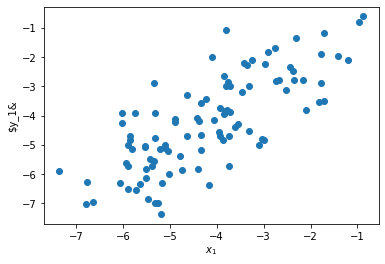

In [79]:
# plot the data

fig, ax = plt.subplots()
ax.scatter(x_1,y_1)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$y_1&')

In [112]:
x_b1 = np.c_[np.ones((n,1)),x_1.T]
theta_best_1=np.dot(np.dot(np.linalg.inv(np.dot(x_b1.T,x_b1)),y_1.T)
theta_best_1

SyntaxError: invalid syntax (<ipython-input-112-4da3a43af776>, line 3)

In [113]:
n_new = 10

x_new_1 = rng.multivariate_normal(mu,cov,(n_new)).T
y_new_1 = x_new_1 +  rng.normal(0,1,n_new)

x_b_new_1 = np.c_[np.ones((x_new1.shape[0],1))]
y_pred_1 = np.dot(x_b_new_1,theta_best_1.T)
y_pred_1

array([[-0.67552785,  0.8494107 ],
       [-0.67552785,  0.8494107 ],
       [-0.67552785,  0.8494107 ],
       [-0.67552785,  0.8494107 ],
       [-0.67552785,  0.8494107 ],
       [-0.67552785,  0.8494107 ],
       [-0.67552785,  0.8494107 ],
       [-0.67552785,  0.8494107 ],
       [-0.67552785,  0.8494107 ],
       [-0.67552785,  0.8494107 ],
       [-0.67552785,  0.8494107 ],
       [-0.67552785,  0.8494107 ],
       [-0.67552785,  0.8494107 ],
       [-0.67552785,  0.8494107 ],
       [-0.67552785,  0.8494107 ],
       [-0.67552785,  0.8494107 ],
       [-0.67552785,  0.8494107 ],
       [-0.67552785,  0.8494107 ],
       [-0.67552785,  0.8494107 ],
       [-0.67552785,  0.8494107 ]])

In [114]:
mean_squared_error(y_new_1,y_pred_1.T)

ValueError: Found input variables with inconsistent numbers of samples: [6, 2]

In [115]:
r2_score(y_new_1,y_pred_1)

ValueError: Found input variables with inconsistent numbers of samples: [6, 20]

In [14]:
regr.fit()

TypeError: fit() missing 2 required positional arguments: 'X' and 'y'